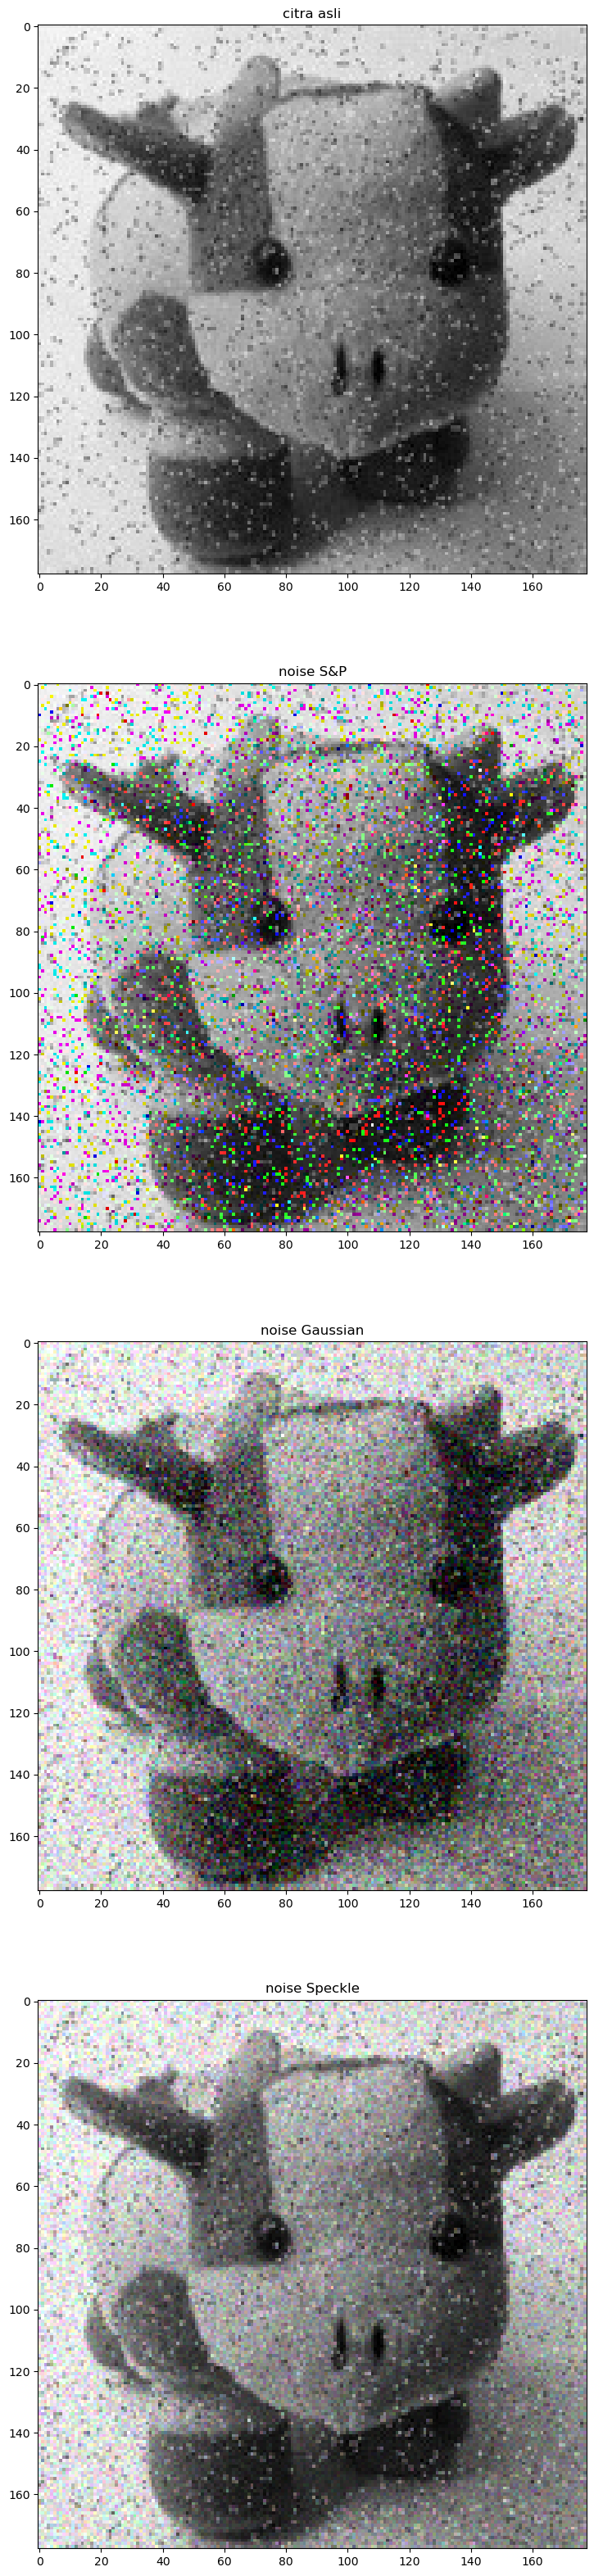

In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

# Membaca gambar asli dan konversi ke RGB
img = cv.imread('boneka.jpg')  
img = cv.cvtColor(img, cv2.COLOR_BGR2RGB)

# Noise: Salt & Pepper, Gaussian, Speckle
noise_sp = random_noise(img, mode='s&p', amount=0.1)
noise_gauss = random_noise(img, mode='gaussian', mean=0, var=0.01)
noise_speckle = random_noise(img, mode='speckle')

noise_sp = np.array(255 * noise_sp, dtype='uint8')
noise_gauss = np.array(255 * noise_gauss, dtype='uint8')
noise_speckle = np.array(255 * noise_speckle, dtype='uint8')

# Plotting hasil seperti di Jupyter Notebook
fig, axs = plt.subplots(4, 1, figsize=(10, 40))
ax = axs.ravel()

ax[0].imshow(img, cmap='gray')
ax[0].set_title('citra asli')

ax[1].imshow(noise_sp, cmap='gray')
ax[1].set_title('noise S&P')

ax[2].imshow(noise_gauss, cmap='gray')
ax[2].set_title('noise Gaussian')

ax[3].imshow(noise_speckle, cmap='gray')
ax[3].set_title('noise Speckle')

plt.show()

In [33]:
kernel_3_3 = np.ones((3,3), np.float32)/9

img_snp_avg_filter = cv.filter2D(noise_sp, cv.CV_8U, kernel_3_3,
                                 (-1,-1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_snp_median_filter = cv.medianBlur(noise_sp, 3)

img_gauss_avg_filter = cv.filter2D(noise_gauss, cv.CV_8U, kernel_3_3,
                                 (-1,-1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_gauss_median_filter = cv.medianBlur(noise_gauss, 3)

img_speckle_avg_filter = cv.filter2D(noise_speckle, cv.CV_8U, kernel_3_3,
                                 (-1,-1), delta=0,
                                 borderType = cv.BORDER_DEFAULT)
img_speckle_median_filter = cv.medianBlur(noise_speckle, 3)

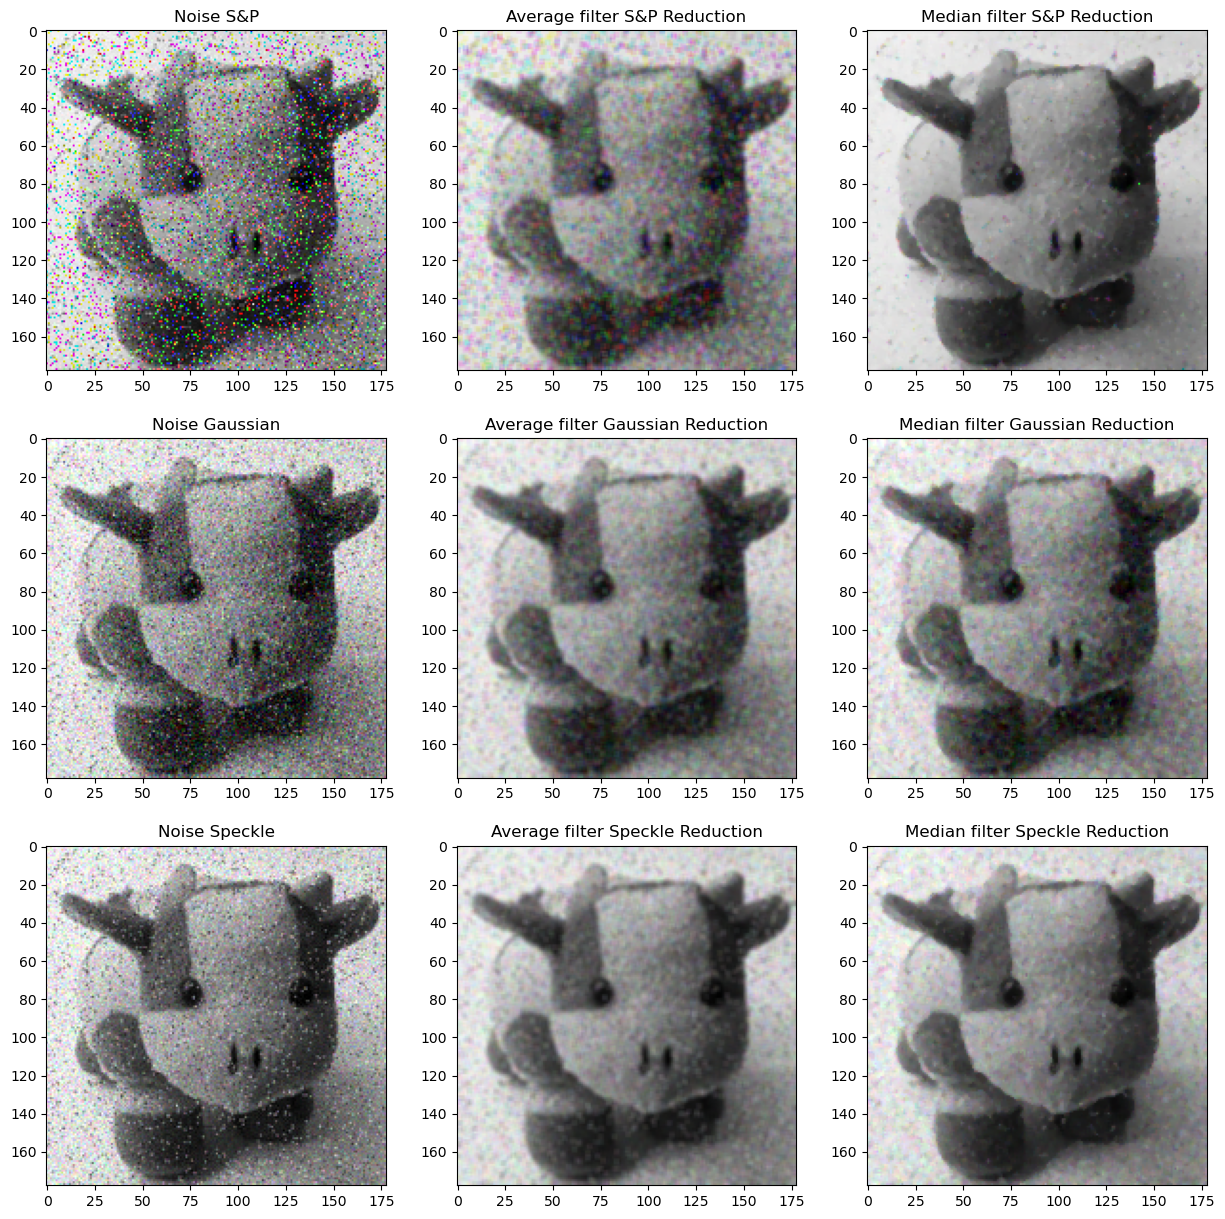

In [35]:
fig, axs = plt.subplots(3, 3, figsize = (15,15))
ax = axs.ravel()

ax[0].imshow(noise_sp)
ax[0].set_title('Noise S&P')

ax[1].imshow(img_snp_avg_filter)
ax[1].set_title('Average filter S&P Reduction')

ax[2].imshow(img_snp_median_filter)
ax[2].set_title('Median filter S&P Reduction')

ax[3].imshow(noise_gauss)
ax[3].set_title('Noise Gaussian')

ax[4].imshow(img_gauss_avg_filter)
ax[4].set_title('Average filter Gaussian Reduction')

ax[5].imshow(img_gauss_median_filter)
ax[5].set_title('Median filter Gaussian Reduction')

ax[6].imshow(noise_speckle)
ax[6].set_title('Noise Speckle')

ax[7].imshow(img_speckle_avg_filter)
ax[7].set_title('Average filter Speckle Reduction')

ax[8].imshow(img_speckle_median_filter)
ax[8].set_title('Median filter Speckle Reduction')

plt.show()